In [2]:
# installing fredapi
!pip install fredapi

In [3]:
# import libraries
import pandas as pd
import json
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from dotenv import load_dotenv
from fredapi import Fred


In [4]:
# Configure settings
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

# fred_key = 'fred-api'

# import the API key
load_dotenv()
fred_api_key = os.getenv("FRED_API_KEY")
# display(fred_api_key)

In [5]:
# Load FRED API key
fred = Fred(api_key=fred_api_key)

In [6]:
# Search for Unemployment data
unemp_results = fred.search('unemployment')
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-12-11,2024-12-11,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-12-11,2024-12-11,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-12-06 07:46:03-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-12-11,2024-12-11,Unemployment Level,1948-01-01,2024-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-12-06 07:47:06-06:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-12-11,2024-12-11,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-12-11,2024-12-11,Continued Claims (Insured Unemployment),1967-01-07,2024-11-23,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-12-05 07:33:04-06:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-12-11,2024-12-11,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-12-11,2024-12-11,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-12-11,2024-12-11,Unemployment Rate - Married Women,1955-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:33-06:00,9,To obtain estimates of women worker employment...


In [7]:
# Export unemployment data to CSV
unemp_results.to_csv("../Output/FRED/unemployment_data.csv", encoding="utf-8")

In [8]:
# Fetch Unemployment Rate data from FRED
unrate = fred.get_series('UNRATE')
unrate_df = pd.DataFrame(unrate, columns=['unrate'])
unrate_df.index.name = 'Date'
unrate_df.index = pd.to_datetime(unrate_df.index) 
unrate_df

,unrate
Date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-07-01,4.3
2024-08-01,4.2
2024-09-01,4.1


In [9]:
# Export unemployment rate data to CSV
unrate_df.to_csv("../Output/FRED/unemployment_rate_data.csv", encoding="utf-8")

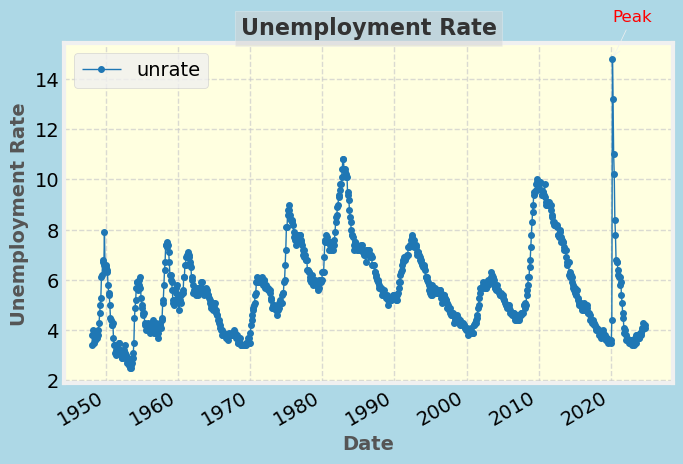

In [10]:
#Plotting Unemployment Rate Over Time
plt.figure(figsize=(7, 5))

# Fill entire background of the plot area
plt.gca().set_facecolor('lightyellow')  # Background color for the plot area

# Plot line
plt.plot(unrate_df.index, unrate_df['unrate'], color='#1f77b4', linewidth=1, marker='o', markersize=4, label='unrate')

# Customize the plot
plt.title('Unemployment Rate', fontsize=16, fontweight='bold', color='#333333', bbox=dict(facecolor='lightgrey', alpha=0.5))
plt.xlabel('Date', fontsize=14, fontweight='bold', color='#555555')
plt.ylabel('Unemployment Rate', fontsize=14, fontweight='bold', color='#555555')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add annotations
max_gdp_index = unrate_df['unrate'].idxmax()
max_gdp_value = unrate_df.loc[max_gdp_index, 'unrate']

plt.annotate('Peak', xy=(max_gdp_index, max_gdp_value), 
             xytext=(max_gdp_index, max_gdp_value * 1.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='red')

# Format x-axis to show dates better
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()  # Rotate date labels

# Customize figure background color
plt.gcf().patch.set_facecolor('lightblue')  # Background color for the entire figure

# Show the plot
plt.show()

In [11]:
# Search for unemployment state data
unemp_stated = fred.search('unemployment state')
unemp_stated.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-12-11,2024-12-11,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-12-11,2024-12-11,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-12-06 07:46:03-06:00,58,The unemployment rate represents the number of...
CCSA,CCSA,2024-12-11,2024-12-11,Continued Claims (Insured Unemployment),1967-01-07,2024-11-23,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-12-05 07:33:04-06:00,74,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2024-12-11,2024-12-11,Continued Claims (Insured Unemployment),1967-01-07,2024-11-23,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2024-12-05 07:33:08-06:00,39,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2024-12-11,2024-12-11,Unemployment Level,1948-01-01,2024-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-12-06 07:47:06-06:00,71,The series comes from the 'Current Population ...


In [12]:
# Export unemployment state data to CSV
unemp_stated.to_csv("../Output/FRED/unemployment_state_data.csv", encoding="utf-8")

In [13]:
# Search for GDP Over time
GDP = fred.get_series('GDP')
GDP_df = pd.DataFrame(GDP, columns=['GDP'])
GDP_df.index.name = 'Date'
GDP_df.index = pd.to_datetime(GDP_df.index) 
GDP_df

,GDP
Date,
1946-01-01,NaN
1946-04-01,NaN
1946-07-01,NaN
1946-10-01,NaN
1947-01-01,243.164
...,...
2023-07-01,27967.697
2023-10-01,28296.967
2024-01-01,28624.069


In [14]:
# Export GDP data to CSV
GDP_df.to_csv("../Output/FRED/GDP_data.csv", encoding="utf-8")

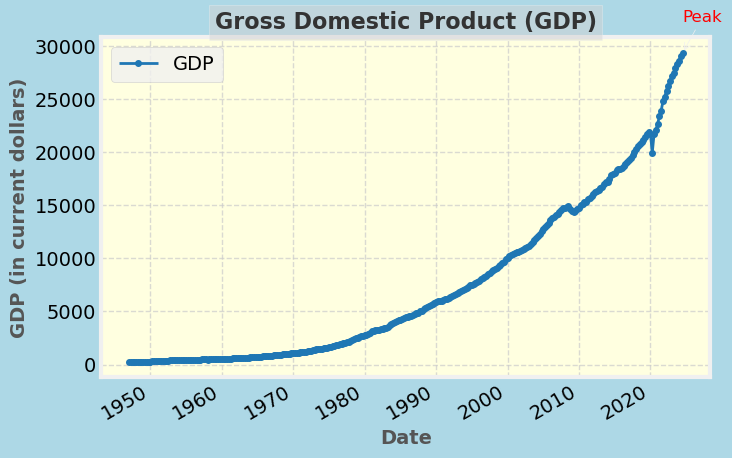

In [15]:
# Gross Domestic Product (GDP) Rate Over Time
plt.figure(figsize=(7, 5))

# Fill entire background of the plot area
plt.gca().set_facecolor('lightyellow')  # Background color for the plot area

# Plot line
plt.plot(GDP_df.index, GDP_df['GDP'], color='#1f77b4', linewidth=2, marker='o', markersize=4, label='GDP')

# Customize the plot
plt.title('Gross Domestic Product (GDP)', fontsize=16, fontweight='bold', color='#333333', bbox=dict(facecolor='lightgrey', alpha=0.5))
plt.xlabel('Date', fontsize=14, fontweight='bold', color='#555555')
plt.ylabel('GDP (in current dollars)', fontsize=14, fontweight='bold', color='#555555')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add annotations
max_gdp_index = GDP_df['GDP'].idxmax()
max_gdp_value = GDP_df.loc[max_gdp_index, 'GDP']

plt.annotate('Peak', xy=(max_gdp_index, max_gdp_value), 
             xytext=(max_gdp_index, max_gdp_value * 1.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='red')

# Format x-axis to show dates better
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()  # Rotate date labels

# Customize figure background color
plt.gcf().patch.set_facecolor('lightblue')  # Background color for the entire figure

# Show the plot
plt.show()

In [16]:
# Retrieving and Preparing Consumet Price Index (CPI) Data for Inflation
Inflation = fred.get_series('CPIAUCNS')
Inflation_df = pd.DataFrame(Inflation, columns=['Inflation'])
Inflation_df.index.name = 'Date'
Inflation_df.index = pd.to_datetime(Inflation_df.index)
Inflation_df

,Inflation
Date,
1913-01-01,9.800
1913-02-01,9.800
1913-03-01,9.800
1913-04-01,9.800
1913-05-01,9.700
...,...
2024-07-01,314.540
2024-08-01,314.796
2024-09-01,315.301


In [17]:
# Export CPI data to CSV
GDP_df.to_csv("../Output/FRED/CPI_data.csv", encoding="utf-8")

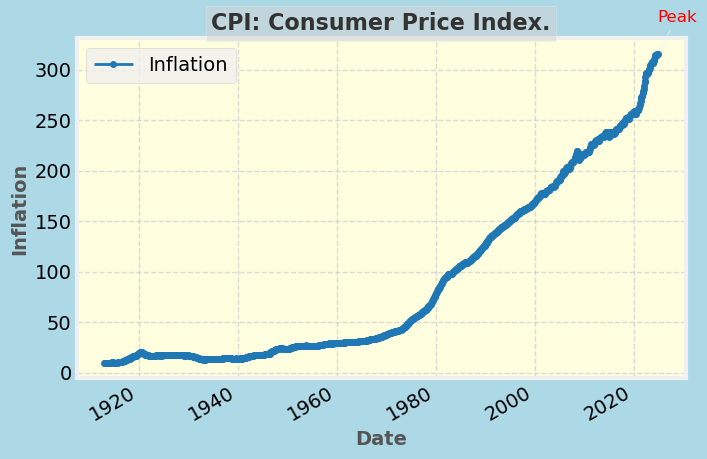

In [18]:
# Plotting Consumer Price Index (CPI) Data 
plt.figure(figsize=(7, 5))

# Fill entire background of the plot area
plt.gca().set_facecolor('lightyellow')  # Background color for the plot area

# Plot line
plt.plot(Inflation_df.index, Inflation_df['Inflation'], color='#1f77b4', linewidth=2, marker='o', markersize=4, label='Inflation')

# Customize the plot
plt.title('CPI: Consumer Price Index.', fontsize=16, fontweight='bold', color='#333333', bbox=dict(facecolor='lightgrey', alpha=0.5))
plt.xlabel('Date', fontsize=14, fontweight='bold', color='#555555')
plt.ylabel('Inflation', fontsize=14, fontweight='bold', color='#555555')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add annotations
max_gdp_index = Inflation_df['Inflation'].idxmax()
max_gdp_value = Inflation_df.loc[max_gdp_index, 'Inflation']

plt.annotate('Peak', xy=(max_gdp_index, max_gdp_value), 
             xytext=(max_gdp_index, max_gdp_value * 1.1),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='red')

# Format x-axis to show dates better
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()  # Rotate date labels

# Customize figure background color
plt.gcf().patch.set_facecolor('lightblue')  # Background color for the entire figure

# Show the plot
plt.show()